<a href="https://colab.research.google.com/github/akbarajou/mnist_numpy/blob/main/mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello")

Hello


# Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load Dataset

In [ ]:
mnist_ds = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_ds.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


# Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Train the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# evaluate the model
model.evaluate(x_test, y_test)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7997 - loss: 9.0539
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8885 - loss: 0.4918
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9142 - loss: 0.3441
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9271 - loss: 0.2715
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9406 - loss: 0.2281


# Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
true value: 4
[2.5126726e-06 5.3482613e-17 1.6526109e-16 3.4359153e-14 9.9940073e-01
 9.9368474e-13 2.4472042e-08 2.2534345e-04 4.7111146e-07 3.7096205e-04]
predicted value: 4


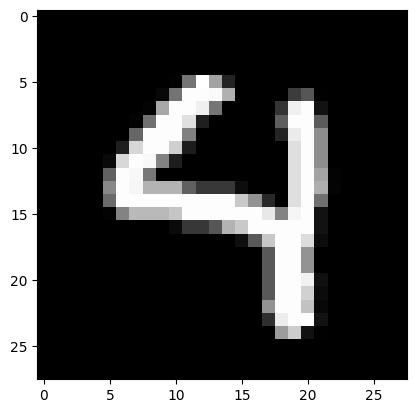

In [ ]:
n = np.random.randint(1, len(x_test))
predictions = model.predict(x_test)
print(f'true value: {y_test[n]}')
print(predictions[n])
print(f'predicted value: {np.argmax(predictions[n])}')
plt.imshow(x_test[n], cmap='gray')
plt.show()

# Save the model

In [ ]:
model.save('mnistdigits.keras')
print('model saved')

model saved


# Load pre-built model

In [ ]:
if os.path.exists('mnistdigits.keras'):
    mymodel = tf.keras.models.load_model('mnistdigits.keras')
    print('Model loaded from disk.')
else:
    print('Model not found. Please train and save the model first.')

Model loaded from disk.


# Prediction on custom image

In [ ]:
img = plt.imread('three.png')
print(img.shape)

# Check if the image is already grayscale
if len(img.shape) == 2:
    print("Image is already grayscale.")
else:
    # Convert to grayscale using broadcasting
    img = np.uint8(np.average(img, axis=2))
    print("Image converted to grayscale.")

print(img.shape)

# Resize the image to 28x28 pixels
l1 = 28 / img.shape[0]
l2 = 28 / img.shape[1]
newimg = np.zeros((28, 28))
for x in range(28):
    for y in range(28):
        newimg[x][y] = img[int(x / l1)][int(y / l2)]

# Invert the image colors
newimg = 255 - newimg
z = np.array(newimg)
z = z.reshape((1, 28, 28))

SyntaxError: not a PNG file (<string>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[1.1847180e-25 8.7329774e-08 6.9374223e-10 1.0821636e-11 4.6005789e-11
 4.6645109e-20 0.0000000e+00 9.9999988e-01 4.6346260e-12 5.2344092e-08]
predicted value: 7


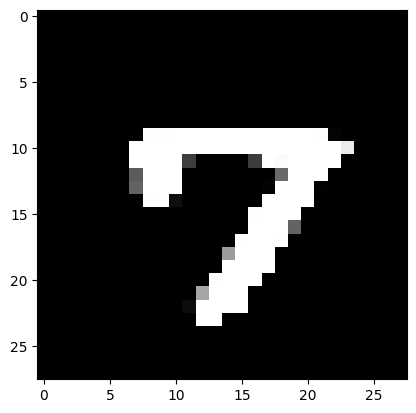

In [ ]:
predictions = mymodel.predict([z])
print(predictions[0])
print(f'predicted value: {np.argmax(predictions[0])}')
plt.imshow(z[0], cmap='gray')
plt.show()